In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver

In [2]:
macbook_air = []

In [3]:
for i in range (1,41):
    mac=[]
    url="https://www.amazon.in/Apple-MacBook-Chip-13-inch-256GB/product-reviews/B08N5W4NNB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviewsshowViewpoints=1&pageNumber="+str(i)
    response=requests.get(url)
    soup=bs(response.content,"html.parser")
    reviews=soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
    for i in range (len(reviews)):
        mac.append(reviews[i].text)
    macbook_air=macbook_air+mac

In [4]:
macbook_air

["\n\n  Best in class. Performance, Display, Battery backup are above excellent.A must have for every tech geekBought this after selling my Yamaha R15, but no regrets.... It's speed is better than R15. 😅\n\n",
 "\n\n  Pros:-1. It's Superfast. It will feel fast on everything - from bootup, to app opening, to builds etc.2. It's slim. Air has no fan hence it's form factor is even slimmer than Pro.3. It remains cold even during heavy code builds. It's hard to find things which makes it warm actually.4. I have tried several graphics heavy games and they run great without any heat as well5. If you are just browsing with Wifi on, typically it loses 10% battery in 7-8 hours. But it's for Safari browser. It has achieved I guess what people will call power-efficiency nirvana.6. Screen, Sound and Mic quality are awesomeCons:-1. Since it's winters in India now, some people might not like that it doesn't heat up the surroundings2. For longer workloads - like if you are doing daily large video compr

In [5]:
len(macbook_air)

350

In [6]:
rev={"review":macbook_air}

In [7]:
review_data=pd.DataFrame.from_dict(rev)
pd.set_option('max_colwidth',800)

In [8]:
review_data

,review
0,"\n\n Best in class. Performance, Display, Battery backup are above excellent.A must have for every tech geekBought this after selling my Yamaha R15, but no regrets.... It's speed is better than R15. 😅\n\n"
1,"\n\n Pros:-1. It's Superfast. It will feel fast on everything - from bootup, to app opening, to builds etc.2. It's slim. Air has no fan hence it's form factor is even slimmer than Pro.3. It remains cold even during heavy code builds. It's hard to find things which makes it warm actually.4. I have tried several graphics heavy games and they run great without any heat as well5. If you are just browsing with Wifi on, typically it loses 10% battery in 7-8 hours. But it's for Safari browser. It has achieved I guess what people will call power-efficiency nirvana.6. Screen, Sound and Mic quality are awesomeCons:-1. Since it's winters in India now, some people might not like that it doesn't heat up the surroundings2. For longer workloads - like if you are doing daily large video compressions/..."
2,"\n\n If we could get it for around 70-75k with some kind of discount that would b huge.. anyways, super excited.\n\n"
3,"\n\n Ordered the M1 Air on 5th August and got it delivered on the 7th. Then on 18th noticed a black/grey spot on the display... quick google search revealed this as a dead pixel and quite common with M1 Macs. So I called up Apple and they offered me two options, either a new replacement Mac or full refund since mine is still under 14 days. As soon as I revealed that I purchased from Amazon, the Apple sales team said sorry they can't help me since Amazon is not Apple authorised seller.I'm never buying another Apple product from Amazon again. If you want the full Apple experience like seamless replacement, refund or after sales then you need to buy it from Apple or from any of its authorised sellers. I made a costly mistake hope others will not after reading this message.\n\n"
4,"\n\n Since the Macbook adapter is having only 2 pins, I am facing earthing issues and the laptop is giving shocks while charging. This is a very expensive laptop and Apple must provide a free 3 pin adapter to avoid earthing issues.\n\n"
...,...
345,\n\n Everything is premium. But don’t but if you are sensitive to headaches and eye strain. Personally I’m sensitive to leds(pwm flickering) Else you will lose money and as well health. Just want to share me experience and awareness. Happy if at least one was helped. Also i didn’t like the fact there are no apps for Netflix and amazon prime even after more than 6 months of release.\n\n
346,"\n\n I took my 1st Apple Product i.e. MBA M1 this June 21, and as usual I used it at night one day and when I opened it the next morning, it was dead, in just 2 months time. Finally it is repaired now since under warranty, but could have costed me 50 grands to get it repaired when out of warranty. Worst product ever. Never going to buy an APPLE product ever in my life. Never ever. I have used several laptops, but being dead in just 2 months is a new thing. A piece of advice, don't buy it, there are plenty of other good products in the market which will last long, at the least longer than 6 months. Didn't expect it from a brand like Apple.\n\n"
347,"\n\n It's the best laptop for students as well as adults.I would recommend if you are a university student buy the macbook from apple store for education(online) where you will get this at a price of 83,000 only,that's almost 9to 10000 off!\n\n"
348,"\n\n Top notch. 2 day battery life for medium use. Performance is great. So good that it stays cool to the touch even after an hour of continual use. Apple quality: the CNC Aluminum body is just perfection, with no sharp edges. The palm rest is rigid, supportive, and out of range of the hot components, meaning, it’s cool to the touch. Always. Now, the reason only 4 stars awarded to this amazing machine. The absolute garbage external monitor experience. Trust me. It’s bad. Though the output resolution is the pro

In [9]:
text=" ".join(review_data)

In [10]:
def clean_text(text):
    text=re.sub('@[A-Za-z0-9]+','',str(text))
    text=re.sub('#','',str(text))
    text=re.sub('RT[\s]+','',str(text))
    text=re.sub('\n\n','',str(text)) 
    text=text.lower()
    text=re.sub('https?:\/\/\S+','',str(text)) 
    
    return text
review_data["review"]=review_data["review"].apply(clean_text)

In [11]:
review_data

,review
0,"best in class. performance, display, battery backup are above excellent.a must have for every tech geekbought this after selling my yamaha r15, but no regrets.... it's speed is better than r15. 😅"
1,"pros:-1. it's superfast. it will feel fast on everything - from bootup, to app opening, to builds etc.2. it's slim. air has no fan hence it's form factor is even slimmer than pro.3. it remains cold even during heavy code builds. it's hard to find things which makes it warm actually.4. i have tried several graphics heavy games and they run great without any heat as well5. if you are just browsing with wifi on, typically it loses 10% battery in 7-8 hours. but it's for safari browser. it has achieved i guess what people will call power-efficiency nirvana.6. screen, sound and mic quality are awesomecons:-1. since it's winters in india now, some people might not like that it doesn't heat up the surroundings2. for longer workloads - like if you are doing daily large video compressions/conv..."
2,"if we could get it for around 70-75k with some kind of discount that would b huge.. anyways, super excited."
3,"ordered the m1 air on 5th august and got it delivered on the 7th. then on 18th noticed a black/grey spot on the display... quick google search revealed this as a dead pixel and quite common with m1 macs. so i called up apple and they offered me two options, either a new replacement mac or full refund since mine is still under 14 days. as soon as i revealed that i purchased from amazon, the apple sales team said sorry they can't help me since amazon is not apple authorised seller.i'm never buying another apple product from amazon again. if you want the full apple experience like seamless replacement, refund or after sales then you need to buy it from apple or from any of its authorised sellers. i made a costly mistake hope others will not after reading this message."
4,"since the macbook adapter is having only 2 pins, i am facing earthing issues and the laptop is giving shocks while charging. this is a very expensive laptop and apple must provide a free 3 pin adapter to avoid earthing issues."
...,...
345,everything is premium. but don’t but if you are sensitive to headaches and eye strain. personally i’m sensitive to leds(pwm flickering) else you will lose money and as well health. just want to share me experience and awareness. happy if at least one was helped. also i didn’t like the fact there are no apps for netflix and amazon prime even after more than 6 months of release.
346,"i took my 1st apple product i.e. mba m1 this june 21, and as usual i used it at night one day and when i opened it the next morning, it was dead, in just 2 months time. finally it is repaired now since under warranty, but could have costed me 50 grands to get it repaired when out of warranty. worst product ever. never going to buy an apple product ever in my life. never ever. i have used several laptops, but being dead in just 2 months is a new thing. a piece of advice, don't buy it, there are plenty of other good products in the market which will last long, at the least longer than 6 months. didn't expect it from a brand like apple."
347,"it's the best laptop for students as well as adults.i would recommend if you are a university student buy the macbook from apple store for education(online) where you will get this at a price of 83,000 only,that's almost 9to 10000 off!"
348,"top notch. 2 day battery life for medium use. performance is great. so good that it stays cool to the touch even after an hour of continual use. apple quality: the cnc aluminum body is just perfection, with no sharp edges. the palm rest is rigid, supportive, and out of range of the hot components, meaning, it’s cool to the touch. always. now, the reason only 4 stars awarded to this amazing machine. the absolute garbage external monitor experience. trust me. it’s bad. though the output resolution is the promised 4k at 60hz, the font is rubbish, and the apps and windows are b

In [12]:
text=" ".join(review_data["review"])

In [13]:
text

'  best in class. performance, display, battery backup are above excellent.a must have for every tech geekbought this after selling my yamaha r15, but no regrets.... it\'s speed is better than r15. 😅   pros:-1. it\'s superfast. it will feel fast on everything - from bootup, to app opening, to builds etc.2. it\'s slim. air has no fan hence it\'s form factor is even slimmer than pro.3. it remains cold even during heavy code builds. it\'s hard to find things which makes it warm actually.4. i have tried several graphics heavy games and they run great without any heat as well5. if you are just browsing with wifi on, typically it loses 10% battery in 7-8 hours. but it\'s for safari browser. it has achieved i guess what people will call power-efficiency nirvana.6. screen, sound and mic quality are awesomecons:-1. since it\'s winters in india now, some people might not like that it doesn\'t heat up the surroundings2. for longer workloads - like if you are doing daily large video compressions/c

In [14]:
text_tokens = word_tokenize(text)

In [15]:
text_tokens

['best',
 'in',
 'class',
 '.',
 'performance',
 ',',
 'display',
 ',',
 'battery',
 'backup',
 'are',
 'above',
 'excellent.a',
 'must',
 'have',
 'for',
 'every',
 'tech',
 'geekbought',
 'this',
 'after',
 'selling',
 'my',
 'yamaha',
 'r15',
 ',',
 'but',
 'no',
 'regrets',
 '....',
 'it',
 "'s",
 'speed',
 'is',
 'better',
 'than',
 'r15',
 '.',
 '😅',
 'pros',
 ':',
 '-1.',
 'it',
 "'s",
 'superfast',
 '.',
 'it',
 'will',
 'feel',
 'fast',
 'on',
 'everything',
 '-',
 'from',
 'bootup',
 ',',
 'to',
 'app',
 'opening',
 ',',
 'to',
 'builds',
 'etc.2',
 '.',
 'it',
 "'s",
 'slim',
 '.',
 'air',
 'has',
 'no',
 'fan',
 'hence',
 'it',
 "'s",
 'form',
 'factor',
 'is',
 'even',
 'slimmer',
 'than',
 'pro.3',
 '.',
 'it',
 'remains',
 'cold',
 'even',
 'during',
 'heavy',
 'code',
 'builds',
 '.',
 'it',
 "'s",
 'hard',
 'to',
 'find',
 'things',
 'which',
 'makes',
 'it',
 'warm',
 'actually.4',
 '.',
 'i',
 'have',
 'tried',
 'several',
 'graphics',
 'heavy',
 'games',
 'and',
 't

In [16]:
text_without_sw=[word for word in text_tokens if not word in stopwords.words()]

In [17]:
tf=TfidfVectorizer()

In [18]:
text_tf=tf.fit_transform(text_without_sw)

In [19]:
feature_names=tf.get_feature_names()
dense=text_tf.todense()
denselist=dense.tolist()
df=pd.DataFrame(denselist,columns=feature_names)

In [20]:
df

,000,10,100,10000,1080p,10finally,10get,10hours,10i,10k,...,years,yes,yet,ymmv,you,youtube,yu,zephyrus,zero,zips
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8868,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
words_list=" ".join(df)

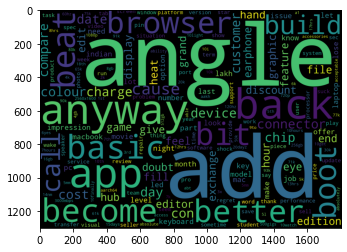

In [22]:
wordcloud=WordCloud(background_color="black",width=1800,height=1300).generate(words_list)
plt.imshow(wordcloud)

In [23]:
with open ("C:\\Users\\Shanaz Dewan\\Downloads\\positive-words.txt","r") as pw:
    positive_words=pw.read().split("/n")
    
positive_words=positive_words[35:]

In [24]:
with open ("C:\\Users\\Shanaz Dewan\\Downloads\\negative-words.txt","r") as nw:
    negative_words=nw.read().split("/n")
    
negative_words=negative_words[35:] 

In [25]:
neg_text=" ".join([word for word in df if not word in negative_words])

In [26]:
pos_text=" ".join([word for word in df if not word  in positive_words])

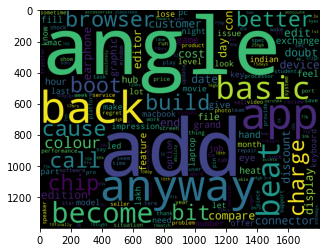

In [27]:
pos_wordcloud=WordCloud(background_color="black",width=1800,height=1400).generate(pos_text)
plt.imshow(pos_wordcloud)

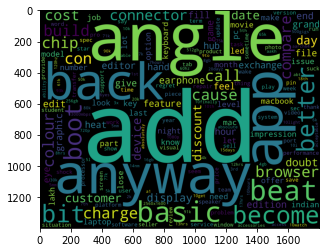

In [28]:
neg_wordcloud=WordCloud(background_color="black",width=1800,height=1400).generate(neg_text)
plt.imshow(neg_wordcloud)

In [29]:
from textblob import TextBlob
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["review"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

review_data[["subjectivity", "polarity"]] = review_data.apply(sentiment_analysis, axis=1)
review_data

,review,subjectivity,polarity
0,"best in class. performance, display, battery backup are above excellent.a must have for every tech geekbought this after selling my yamaha r15, but no regrets.... it's speed is better than r15. 😅",0.275000,0.387500
1,"pros:-1. it's superfast. it will feel fast on everything - from bootup, to app opening, to builds etc.2. it's slim. air has no fan hence it's form factor is even slimmer than pro.3. it remains cold even during heavy code builds. it's hard to find things which makes it warm actually.4. i have tried several graphics heavy games and they run great without any heat as well5. if you are just browsing with wifi on, typically it loses 10% battery in 7-8 hours. but it's for safari browser. it has achieved i guess what people will call power-efficiency nirvana.6. screen, sound and mic quality are awesomecons:-1. since it's winters in india now, some people might not like that it doesn't heat up the surroundings2. for longer workloads - like if you are doing daily large video compressions/conv...",0.423249,0.064566
2,"if we could get it for around 70-75k with some kind of discount that would b huge.. anyways, super excited.",0.804167,0.427083
3,"ordered the m1 air on 5th august and got it delivered on the 7th. then on 18th noticed a black/grey spot on the display... quick google search revealed this as a dead pixel and quite common with m1 macs. so i called up apple and they offered me two options, either a new replacement mac or full refund since mine is still under 14 days. as soon as i revealed that i purchased from amazon, the apple sales team said sorry they can't help me since amazon is not apple authorised seller.i'm never buying another apple product from amazon again. if you want the full apple experience like seamless replacement, refund or after sales then you need to buy it from apple or from any of its authorised sellers. i made a costly mistake hope others will not after reading this message.",0.506818,0.033712
4,"since the macbook adapter is having only 2 pins, i am facing earthing issues and the laptop is giving shocks while charging. this is a very expensive laptop and apple must provide a free 3 pin adapter to avoid earthing issues.",0.903333,-0.083333
...,...,...,...
345,everything is premium. but don’t but if you are sensitive to headaches and eye strain. personally i’m sensitive to leds(pwm flickering) else you will lose money and as well health. just want to share me experience and awareness. happy if at least one was helped. also i didn’t like the fact there are no apps for netflix and amazon prime even after more than 6 months of release.,0.740000,0.240000
346,"i took my 1st apple product i.e. mba m1 this june 21, and as usual i used it at night one day and when i opened it the next morning, it was dead, in just 2 months time. finally it is repaired now since under warranty, but could have costed me 50 grands to get it repaired when out of warranty. worst product ever. never going to buy an apple product ever in my life. never ever. i have used several laptops, but being dead in just 2 months is a new thing. a piece of advice, don't buy it, there are plenty of other good products in the market which will last long, at the least longer than 6 months. didn't expect it from a brand like apple.",0.411247,-0.099126
347,"it's the best laptop for students as well as adults.i would recommend if you are a university student buy the macbook from apple store for education(online) where you will get this at a price of 83,000 only,that's almost 9to 10000 off!",0.300000,1.000000
348,"top notch. 2 day battery life for medium use. performance is great. so good that it stays cool to the touch even after an hour of continual use. apple quality: the cnc aluminum body is just perfection, with no sharp edges. the palm rest is rigid, supportive, and out of range of the hot components, meaning, it’s cool to the touch. always. now, the reason only 4 stars awarded to this amazing machine. th

In [30]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
review_data["analysis"] = review_data["polarity"].apply(analysis)
review_data

,review,subjectivity,polarity,analysis
0,"best in class. performance, display, battery backup are above excellent.a must have for every tech geekbought this after selling my yamaha r15, but no regrets.... it's speed is better than r15. 😅",0.275000,0.387500,Positive
1,"pros:-1. it's superfast. it will feel fast on everything - from bootup, to app opening, to builds etc.2. it's slim. air has no fan hence it's form factor is even slimmer than pro.3. it remains cold even during heavy code builds. it's hard to find things which makes it warm actually.4. i have tried several graphics heavy games and they run great without any heat as well5. if you are just browsing with wifi on, typically it loses 10% battery in 7-8 hours. but it's for safari browser. it has achieved i guess what people will call power-efficiency nirvana.6. screen, sound and mic quality are awesomecons:-1. since it's winters in india now, some people might not like that it doesn't heat up the surroundings2. for longer workloads - like if you are doing daily large video compressions/conv...",0.423249,0.064566,Positive
2,"if we could get it for around 70-75k with some kind of discount that would b huge.. anyways, super excited.",0.804167,0.427083,Positive
3,"ordered the m1 air on 5th august and got it delivered on the 7th. then on 18th noticed a black/grey spot on the display... quick google search revealed this as a dead pixel and quite common with m1 macs. so i called up apple and they offered me two options, either a new replacement mac or full refund since mine is still under 14 days. as soon as i revealed that i purchased from amazon, the apple sales team said sorry they can't help me since amazon is not apple authorised seller.i'm never buying another apple product from amazon again. if you want the full apple experience like seamless replacement, refund or after sales then you need to buy it from apple or from any of its authorised sellers. i made a costly mistake hope others will not after reading this message.",0.506818,0.033712,Positive
4,"since the macbook adapter is having only 2 pins, i am facing earthing issues and the laptop is giving shocks while charging. this is a very expensive laptop and apple must provide a free 3 pin adapter to avoid earthing issues.",0.903333,-0.083333,Negative
...,...,...,...,...
345,everything is premium. but don’t but if you are sensitive to headaches and eye strain. personally i’m sensitive to leds(pwm flickering) else you will lose money and as well health. just want to share me experience and awareness. happy if at least one was helped. also i didn’t like the fact there are no apps for netflix and amazon prime even after more than 6 months of release.,0.740000,0.240000,Positive
346,"i took my 1st apple product i.e. mba m1 this june 21, and as usual i used it at night one day and when i opened it the next morning, it was dead, in just 2 months time. finally it is repaired now since under warranty, but could have costed me 50 grands to get it repaired when out of warranty. worst product ever. never going to buy an apple product ever in my life. never ever. i have used several laptops, but being dead in just 2 months is a new thing. a piece of advice, don't buy it, there are plenty of other good products in the market which will last long, at the least longer than 6 months. didn't expect it from a brand like apple.",0.411247,-0.099126,Negative
347,"it's the best laptop for students as well as adults.i would recommend if you are a university student buy the macbook from apple store for education(online) where you will get this at a price of 83,000 only,that's almost 9to 10000 off!",0.300000,1.000000,Positive
348,"top notch. 2 day battery life for medium use. performance is great. so good that it stays cool to the touch even after an hour of continual use. apple quality: the cnc aluminum body is just perfection, with no sharp edges. the palm rest is rigid, supportive, and out of range of the hot components, meaning, it’s cool t

In [31]:
review_data['analysis'].value_counts()

Positive    278
Neutral      43
Negative     29
Name: analysis, dtype: int64

In [32]:
#positive comments
((270+35)/330)*100

92.42424242424242

In [33]:
#negative comments
(25/330)*100

7.575757575757576

So in this review data only 7.57% is about the negative comments so the macbook air product and the positive comments is about 92.42%.